In [1]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import plotly.express as px

%matplotlib inline
sns.set(style="darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv('./Datasets/test.csv')
train = pd.read_csv('./Datasets/train.csv')

In [3]:
train.shape

(1458644, 11)

In [4]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435


In [5]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.99,40.73,-73.99,40.76,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.96,40.68,-73.96,40.66,N
2,id1217141,1,2016-06-30 23:59:47,1,-74.00,40.74,-73.99,40.73,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.96,40.77,-73.99,40.73,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.97,40.76,-73.96,40.76,N


In [6]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


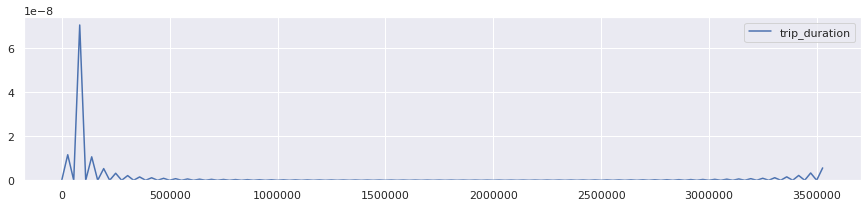

In [8]:
plt.figure(figsize=(15,3))
sns.kdeplot(train['trip_duration'])

In [9]:
outliers = train.loc[train['trip_duration'] > 7200]
train.drop(outliers.index, inplace=True)
print(f"Dropped {outliers.shape[0]} rows from the training data.")

Dropped 2253 rows from the training data.


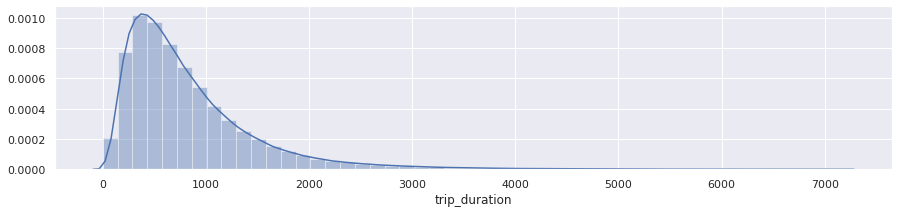

In [10]:
plt.figure(figsize=(15,3))
sns.distplot(train['trip_duration'], bins=50)

In [11]:
min_long = -74.05
max_long = -73.75
min_lat = 40.60
max_lat = 40.85

loc_outliers = train.loc[(train['pickup_longitude'] < min_long) |
                         (train['dropoff_longitude'] < min_long) |
                         (train['pickup_longitude'] > max_long) | 
                         (train['dropoff_longitude'] > max_long) |
                         (train['pickup_latitude'] < min_lat) |
                         (train['dropoff_latitude'] < min_lat) |
                         (train['pickup_latitude'] > max_lat) |
                         (train['dropoff_latitude'] > max_lat)]
train.drop(loc_outliers.index, inplace=True)
print(f"Dropped {loc_outliers.shape[0]} rows from the training data.")

Dropped 15662 rows from the training data.


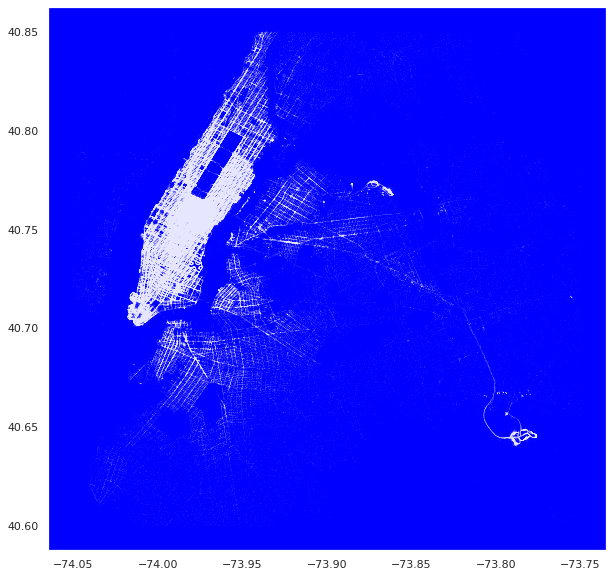

In [12]:
longitude = list(train.pickup_longitude) + list(train.dropoff_longitude)
latitude = list(train.pickup_latitude) + list(train.dropoff_latitude)
fig = plt.figure(figsize = (10,10))
plt.grid(b=None)
ax = sns.scatterplot(x = longitude, y = latitude, marker = '.', s = 0.001)
ax.set_facecolor('blue')
plt.show()

In [13]:
pickup_datetime = pd.to_datetime(train['pickup_datetime'])
train['hour']  = pickup_datetime.dt.hour
train['weekday'] = pickup_datetime.dt.weekday
train['month'] = pickup_datetime.dt.month
train['week'] = pickup_datetime.dt.weekofyear

In [14]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,hour,weekday,month,week
count,1440729.00,1440729.00,1440729.00,1440729.00,1440729.00,1440729.00,1440729.00,1440729.00,1440729.00,1440729.00,1440729.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,826.36,13.61,3.05,3.52,13.83
std,0.50,1.31,0.04,0.03,0.03,0.03,643.39,6.39,1.95,1.68,8.56
min,1.00,0.00,-74.05,40.60,-74.05,40.60,1.00,0.00,0.00,1.00,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,395.00,9.00,1.00,2.00,7.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,656.00,14.00,3.00,4.00,13.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1060.00,19.00,5.00,5.00,20.00
max,2.00,8.00,-73.75,40.85,-73.75,40.85,7191.00,23.00,6.00,6.00,53.00


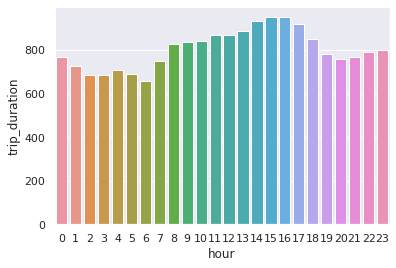

In [15]:
hour_grouped = train.groupby('hour').agg({'trip_duration': 'mean'})
hour_grouped.reset_index(inplace=True)
hour_grouped.columns = ['hour', 'trip_duration']
sns.barplot(x='hour', y='trip_duration', data=hour_grouped)

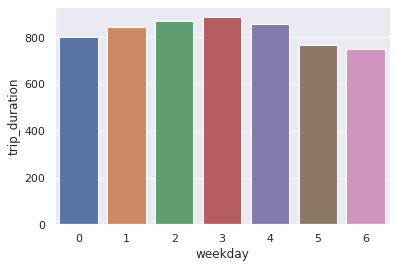

In [16]:
weekday_grouped = train.groupby('weekday').agg({'trip_duration': 'mean'})
weekday_grouped.reset_index(inplace=True)
weekday_grouped.columns = ['weekday', 'trip_duration']
sns.barplot(x='weekday', y='trip_duration', data=weekday_grouped)

In [17]:
weekday_hour_grouped = train.groupby(['weekday', 'hour']).agg({'trip_duration': 'mean'})
weekday_hour_grouped.reset_index(inplace=True)
weekday_hour_grouped.columns = ['weekday', 'hour', 'trip_duration']

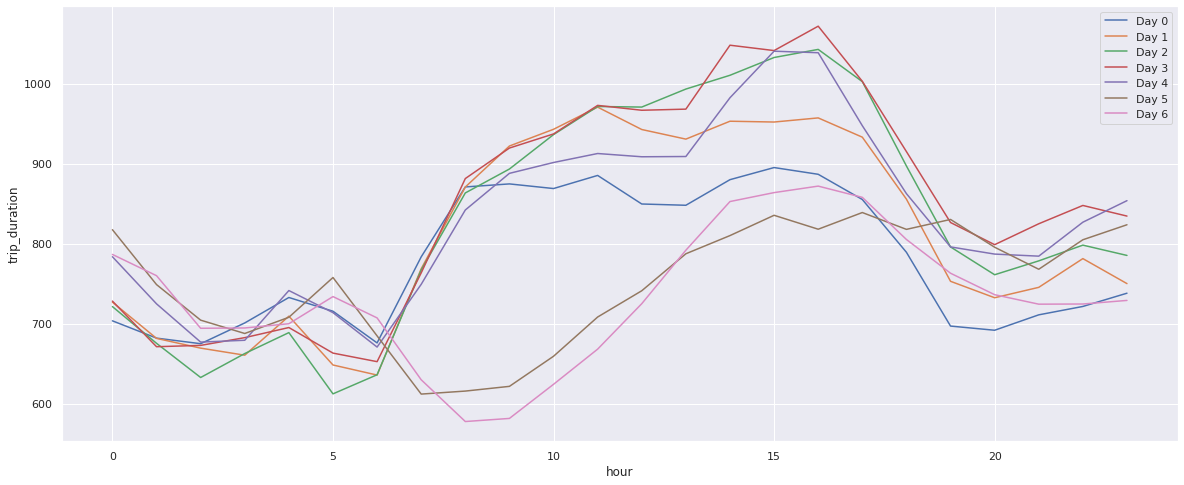

In [18]:
fig = plt.figure(figsize=(20, 8))
for i in range(0,7):
    sns.lineplot(x='hour', y='trip_duration', 
                data=weekday_hour_grouped.loc[weekday_hour_grouped['weekday']==i], label=f'Day {i}')

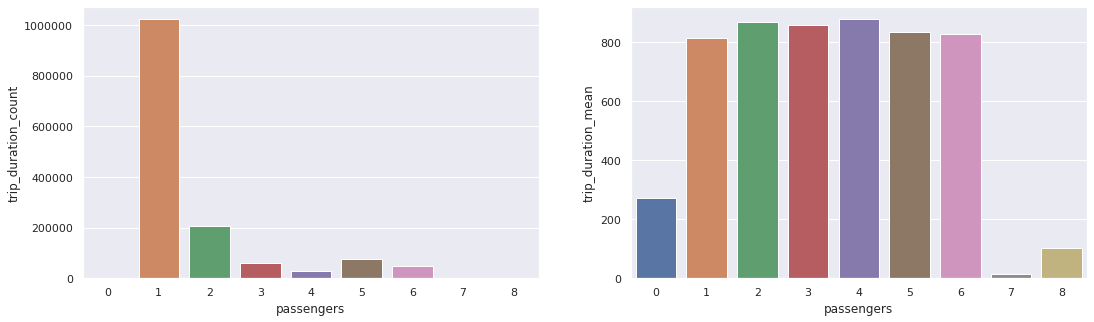

In [19]:
passengers_grouped = train.groupby('passenger_count').agg({'trip_duration': ['count', 'mean']})
passengers_grouped.reset_index(inplace=True)
passengers_grouped.columns = ['passengers', 'trip_duration_count', 'trip_duration_mean']
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot(x='passengers', y='trip_duration_count', data=passengers_grouped, ax=ax[0])
sns.barplot(x='passengers', y='trip_duration_mean', data=passengers_grouped, ax=ax[1])
plt.show()

In [21]:
import math
def calculate_dist(row):
    return math.sqrt(math.pow(row['pickup_longitude'] - row['dropoff_longitude'], 2) \
                     + math.pow(row['pickup_latitude'] - row['dropoff_latitude'], 2))

train['distance'] = train.apply(calculate_dist, axis=1)

<Figure size 720x720 with 0 Axes>

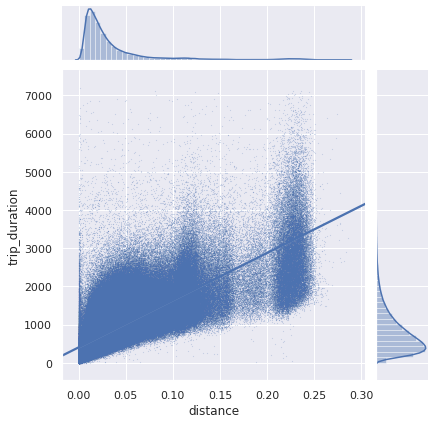

In [22]:
fig = plt.figure(figsize = (10,10))
sns.jointplot(x='distance', y='trip_duration', data=train, kind='reg', scatter_kws={"s": 0.01})

In [23]:
from sklearn.cluster import MiniBatchKMeans

location_clusters = pd.DataFrame()
location_clusters['longitude'] = list(train.pickup_longitude) + list(train.dropoff_longitude)
location_clusters['latitude'] = list(train.pickup_latitude) + list(train.dropoff_latitude)

kmeans = MiniBatchKMeans(n_clusters=25, 
                         random_state=0,
                         batch_size=6,
                         max_iter=10).fit(list(zip(location_clusters.longitude, location_clusters.latitude)))
location_clusters['cluster'] = kmeans.labels_

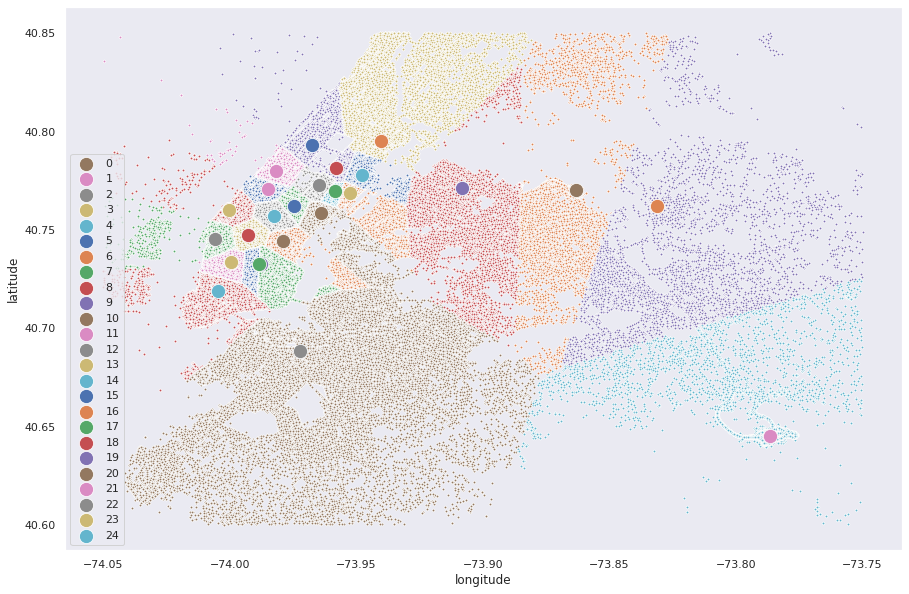

In [24]:
plt.figure(figsize=(15, 10))
plt.grid(b=None)
for cluster in location_clusters['cluster'].unique():
    sns.scatterplot(x = location_clusters.loc[location_clusters['cluster']==cluster]['longitude'],
                    y = location_clusters.loc[location_clusters['cluster']==cluster]['latitude'], 
                    marker = '.', s = 30)
for i, center in enumerate(kmeans.cluster_centers_):
    sns.scatterplot(x = [center[0]], y = [center[1]], s=200, label=f"{i}")
plt.show()

In [25]:
train['pickup_cluster'] =  kmeans.predict(list(zip(train.pickup_longitude, train.pickup_latitude)))
train['dropoff_cluster'] = kmeans.predict(list(zip(train.dropoff_longitude, train.dropoff_latitude)))

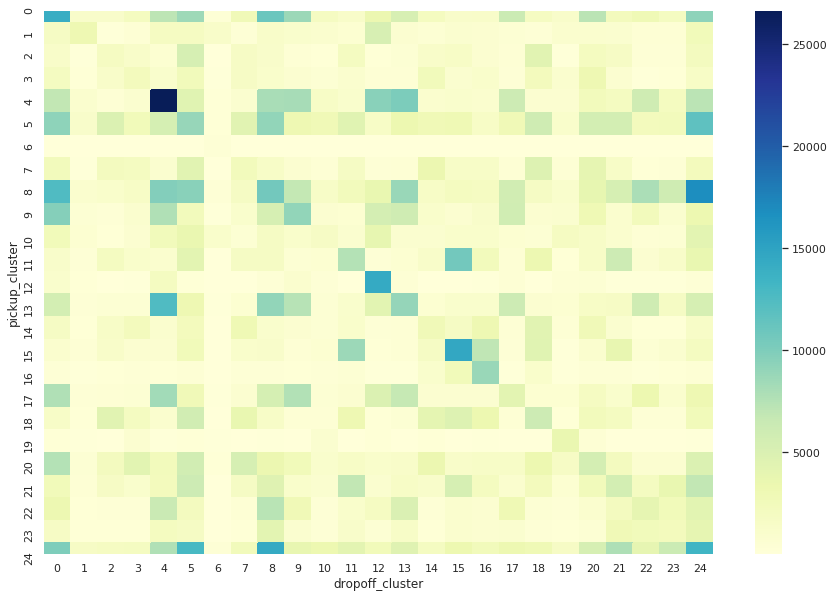

In [34]:
cluster_trips = train[['pickup_cluster', 'dropoff_cluster']].groupby(['pickup_cluster', 'dropoff_cluster'])\
                                                       .size().reset_index(name='trips')
trips_pivot = cluster_trips.pivot('pickup_cluster', 'dropoff_cluster', 'trips')
plt.figure(figsize=(15,10))
sns.heatmap(trips_pivot, cmap="YlGnBu")